# Correlation

Make a correlation map of all the symbols in a portfolio

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

In [3]:
symbols = ['SPY', 'GLD', 'BOND', 'EEM', 'IYR', 
           'JNK', 'LQD', 'NLY',  'PFF', 'PGX',
           'SLY', 'TIP', 'TLT',  'BSV', 'VNQ']
#symbols = ['GLD', 'GDX']
#symbols = ['SPY', '^GSPC']
#symbols = ['LQD', 'TLT']

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime.now()

In [4]:
# Fetch timeseries
portfolio = pf.Portfolio()
ts = portfolio.fetch_timeseries(symbols, start, end, fields=['close'])

In [5]:
ts, start = portfolio.finalize_timeseries(ts, start)

,SLY,TLT,PFF,SPY,NLY,BSV,JNK,BOND,GLD,VNQ,EEM,TIP,PGX,IYR,LQD
SLY,1.00,-0.41,0.66,0.78,0.60,0.13,0.64,-0.03,0.05,0.80,0.59,-0.06,0.50,0.79,0.28
TLT,-0.41,1.00,-0.17,-0.29,-0.22,0.38,-0.22,0.65,0.18,-0.31,-0.22,0.58,-0.05,-0.30,0.45
PFF,0.66,-0.17,1.00,0.75,0.50,0.42,0.78,0.30,0.13,0.73,0.55,0.14,0.93,0.73,0.55
SPY,0.78,-0.29,0.75,1.00,0.48,0.26,0.69,0.11,0.18,0.79,0.76,0.07,0.58,0.79,0.39
NLY,0.60,-0.22,0.50,0.48,1.00,0.19,0.47,0.08,-0.03,0.60,0.31,-0.13,0.42,0.62,0.30
BSV,0.13,0.38,0.42,0.26,0.19,1.00,0.53,0.65,0.30,0.22,0.18,0.47,0.47,0.23,0.77
JNK,0.64,-0.22,0.78,0.69,0.47,0.53,1.00,0.24,0.20,0.69,0.55,0.10,0.71,0.70,0.65
BOND,-0.03,0.65,0.30,0.11,0.08,0.65,0.24,1.00,0.31,0.01,0.06,0.53,0.36,0.03,0.72
GLD,0.05,0.18,0.13,0.18,-0.03,0.30,0.20,0.31,1.00,0.08,0.22,0.36,0.08,0.09,0.27
VNQ,0.80,-0.31,0.73,0.79,0.60,0.22,0.69,0.01,0.08,1.00,0.55,-0.00,0.61,1.00,0.38


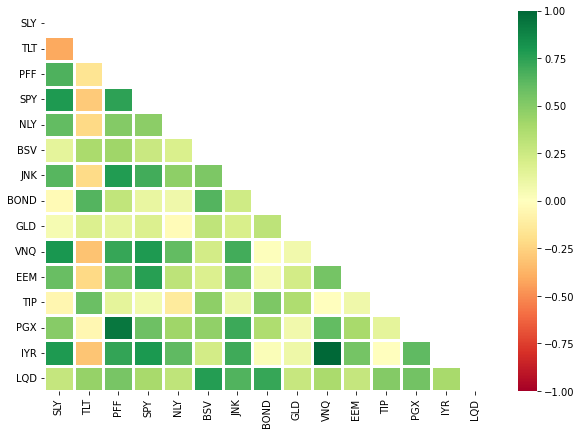

In [6]:
TRADING_DAYS_PER_YEAR, _, _ = pf.get_trading_days()
corr_df = portfolio.correlation_map(ts, method='log', days=TRADING_DAYS_PER_YEAR)
corr_df